In [1]:
%cd ..

/home/klen/Desktop/physics/article2/git


In [2]:
import numpy as np

from src.cond_pdt import ConditionalPDTPlot
from src.correlations import SpatialCoherencePlot, get_correlations
from src.entanglement import GaussianEntanglementPlot, WitnessCoherenceCalculator, WitnessCoherencePlot
from src.bell import BellPlot, BellCalculator, BellPlotTime
from src.nonclassicality import NonclassicalityPlot
from src import utils

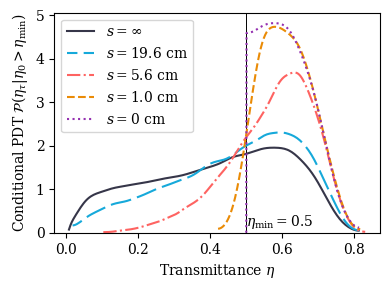

In [3]:
cpdtp = ConditionalPDTPlot(eta_min=0.5)
cpdtp.plot("strong", aperture_radius=0.3, wind_shift=np.inf)
cpdtp.plot("strong", aperture_radius=0.3, wind_shift=0.196, ls=(5, (10, 3)))
cpdtp.plot("strong", aperture_radius=0.3, wind_shift=0.056, ls='-.')
cpdtp.plot("strong_adhoc", aperture_radius=0.3, wind_shift=0.01, ls='--', smooth=10)
cpdtp.plot("strong", aperture_radius=0.3, wind_shift=0, ls=':')
cpdtp.legend()
cpdtp.savefig('supplemental/strong/cond_pdt.pdf')

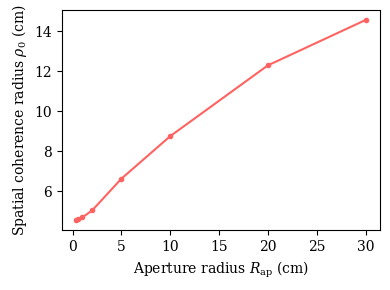

In [4]:
scp = SpatialCoherencePlot()
scp.plot("strong")
# scp.plot_example('strong', aperture_size=0.2)
scp.savefig('supplemental/strong/corr_length.pdf')

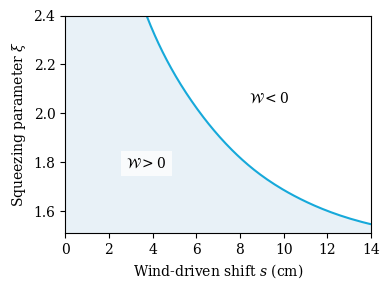

In [3]:
gep = GaussianEntanglementPlot()
gep.plot("strong", aperture_radius=0.2)
gep.ax.set_xlim(0, 14)
gep.ax.set_ylim(1.51, 2.4)
gep.annotate()
gep.savefig('supplemental/strong/entanglement.pdf')

In [4]:
wcc = WitnessCoherenceCalculator(channels=['strong'], squeezing=[1.6, 2])
wcc_data = wcc.get()

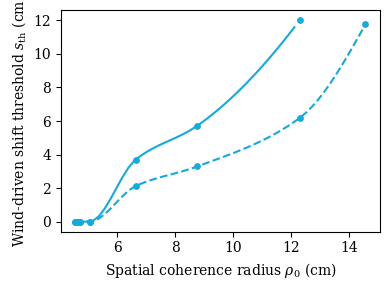

In [8]:
wcp = WitnessCoherencePlot()
wcp.plot(wcc_data, 'strong', per_xi_kwargs=[{}, {'ls': '--'}])
wcp.savefig("supplemental/strong/witness_coherence.pdf")

In [3]:
bc = BellCalculator(channel_name='strong_adhoc_bell', aperture_radius=0.1, channel_length_km=50, nu=5e-4)
strong_b_10_0db = bc.get(wind_speed=10, db_p_ms=0)
strong_b_5_0db = bc.get(wind_speed=5, db_p_ms=0)
strong_b_10_3db = bc.get(wind_speed=10, db_p_ms=3)
strong_b_5_3db = bc.get(wind_speed=5, db_p_ms=3)

bc = BellCalculator(channel_name='strong', aperture_radius=0.1, channel_length_km=50, nu=5e-4)
strong_10_0db = bc.get(wind_speed=10, db_p_ms=0)
strong_5_0db = bc.get(wind_speed=5, db_p_ms=0)
strong_10_3db = bc.get(wind_speed=10, db_p_ms=3)
strong_5_3db = bc.get(wind_speed=5, db_p_ms=3)

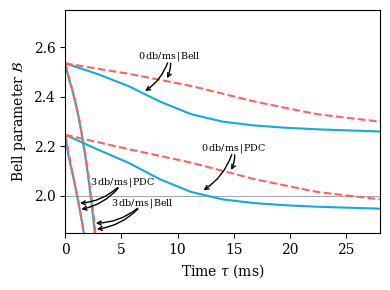

In [5]:
bp = BellPlotTime()
# _params_10 = dict(smooth_value=0.4, bell_kwargs={'color': utils.LINE_COLORS[0]}, pdc_kwargs={'color': utils.LINE_COLORS[1]})
# _params_5 = dict(ls=':', smooth_value=0.4, bell_kwargs={'color': '#7ccfea'}, pdc_kwargs={'color': '#fea8a6'})
_params_10 = dict(smooth_value=0.4, color=utils.LINE_COLORS[0])
_params_5 = dict(ls='--', smooth_value=0.4, color=utils.LINE_COLORS[1])
bp.plot(strong_b_10_3db, wind_speed=10, **_params_10)
bp.plot(strong_b_5_3db, wind_speed=5, **_params_5)
bp.plot(strong_10_0db, wind_speed=10, **_params_10)
bp.plot(strong_5_0db, wind_speed=5, **_params_5, )

# bp.plot_example(bc, time=0.028)
bp.ax.set_ylim(bottom=1.85, top=2.75)
bp.ax.set_xlim(0, 28)

arrowprops = dict(arrowstyle="->", color='k', shrinkA=5, shrinkB=1,
                  patchA=None, patchB=None, connectionstyle="arc3,rad=-0.2")
def _annotate(dbms, state, pos, textpos):
    bp.ax.annotate(f'{dbms}$\\thinspace$db/ms$\\thinspace$|{state}', pos[0], textpos, arrowprops=arrowprops, fontsize="x-small")
    bp.ax.annotate(f'{dbms}$\\thinspace$db/ms$\\thinspace$|{state}', pos[1], textpos, arrowprops=arrowprops, fontsize="x-small", alpha=0)

_annotate(0, 'Bell', [(7, 2.42), (9, 2.47)], (6.5, 2.555))
_annotate(0, 'PDC', [(12.2, 2.02), (14.7, 2.1)], (12.1, 2.185))
_annotate(3, 'Bell', [(2.6, 1.89), (2.7, 1.865)], (4.1, 1.96))
_annotate(3, 'PDC', [(1.2, 1.97), (1.32, 1.945)], (2.22, 2.045))
bp.savefig("supplemental/strong/bell_time.pdf")

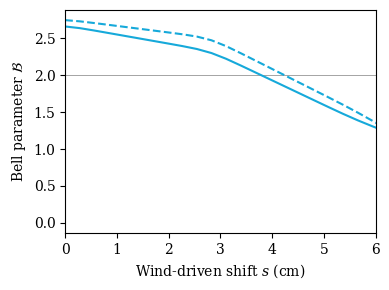

In [5]:
bp = BellPlot()
bp.plot(BellCalculator(channel_name='strong', aperture_radius=0.2, channel_length_km=50).get())
bp.ax.set_xlim(0, 6)
bp.savefig('supplemental/strong/bell.pdf')

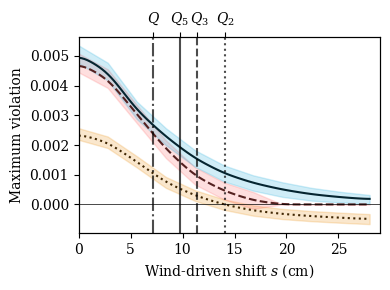

In [6]:
ncp = NonclassicalityPlot()
ncp.plot("strong", aperture_radius=0.3, channel_length_km=50)
ncp.savefig('supplemental/strong/nonclass.pdf')